In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rc('figure', figsize=(10, 20))
np.set_printoptions(precision=4, suppress=True)

%matplotlib inline

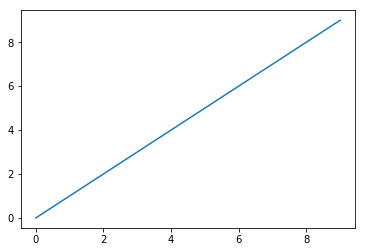

In [2]:
data = np.arange(10)
plt.plot(data)

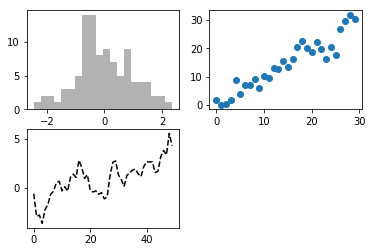

In [8]:
fig = plt.figure()

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

plt.plot(np.random.randn(50).cumsum(),'k--')
ax1.hist(np.random.randn(100),bins=20,color='k',alpha=0.3)
ax2.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1106c44e0>,
      dtype=object)

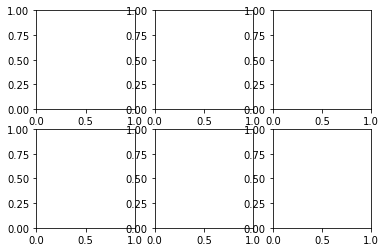

In [10]:
fig,axes = plt.subplots(2,3)
axes

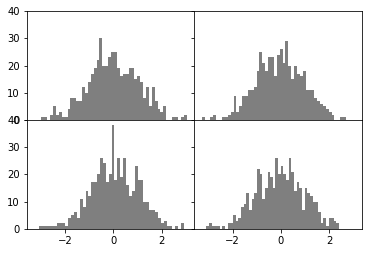

In [13]:
fig,axes = plt.subplots(2,2,sharex=True,sharey=True)
for axe in axes.flat:
    axe.hist(np.random.randn(500),bins=50,color='k',alpha=0.5)
plt.subplots_adjust(wspace=0,hspace=0)

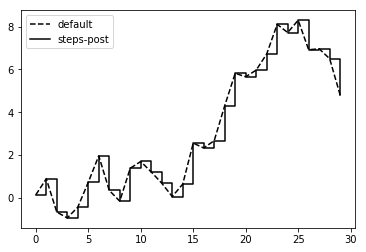

In [19]:
data = np.random.randn(30).cumsum()
plt.plot(data,'k--',label='default')
plt.plot(data,'k-',label='steps-post',drawstyle='steps-post')
plt.legend(loc='best')

In [30]:
from datetime import datetime

In [32]:
!head examples/spx.csv

,SPX
1990-02-01 00:00:00,328.79
1990-02-02 00:00:00,330.92
1990-02-05 00:00:00,331.85
1990-02-06 00:00:00,329.66
1990-02-07 00:00:00,333.75
1990-02-08 00:00:00,332.96
1990-02-09 00:00:00,333.62
1990-02-12 00:00:00,330.08
1990-02-13 00:00:00,331.02


In [33]:
data = pd.read_csv('examples/spx.csv',index_col=0,parse_dates=True)
data.head()

,SPX
1990-02-01,328.79
1990-02-02,330.92
1990-02-05,331.85
1990-02-06,329.66
1990-02-07,333.75


In [34]:
spx = data['SPX']

In [38]:
spx.asof(datetime(2007,10,11))

1554.41

(600, 1800)

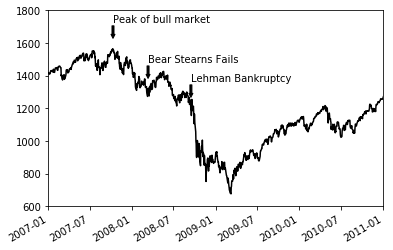

In [48]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007,10,11),'Peak of bull market'),
    (datetime(2008,3,12),'Bear Stearns Fails'),
    (datetime(2008,9,15), 'Lehman Bankruptcy')
]

for date,label in crisis_data:
    ax.annotate(label,xy=(date,spx.asof(date)+75),
                xytext=(date,spx.asof(date)+225),
                arrowprops=dict(facecolor='black',headwidth=4,width=2,headlength=4),
                horizontalalignment='left',
                verticalalignment='top')
ax.set_xlim(['1/1/2007','1/1/2011'])
ax.set_ylim([600,1800])

In [50]:
df = pd.DataFrame(np.random.rand(6,4),
                  index=list('abcdef'),
                  columns=pd.Index(['one','two','three','four'],name='Genus'))
df

Genus,one,two,three,four
a,0.494774,0.837423,0.262273,0.036167
b,0.950989,0.887546,0.942398,0.752661
c,0.241840,0.399405,0.068462,0.612699
d,0.058991,0.292876,0.634892,0.208279
e,0.879551,0.683405,0.120710,0.628453
f,0.155119,0.856044,0.710415,0.156120


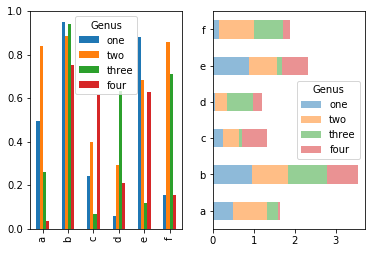

In [61]:
fig,axes = plt.subplots(1,2)
df.plot.bar(ax=axes[0])
df.plot.barh(ax=axes[1],stacked=True, alpha=0.5)

In [62]:
tips = pd.read_csv('examples/tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [75]:
party_counts = pd.crosstab(tips['day'],tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [76]:
party_counts = party_counts.loc[:,2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


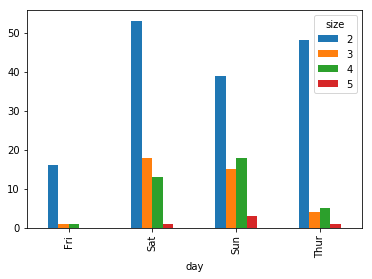

In [85]:
party_counts.plot.bar()

In [77]:
_party_counts = party_counts.div(party_counts.sum(1),axis=0)
_party_counts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


In [90]:
import seaborn as sns

In [94]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069
5,25.29,4.71,No,Sun,Dinner,4,0.228863
6,8.77,2.00,No,Sun,Dinner,2,0.295421
7,26.88,3.12,No,Sun,Dinner,4,0.131313
8,15.04,1.96,No,Sun,Dinner,2,0.149847
9,14.78,3.23,No,Sun,Dinner,2,0.279654


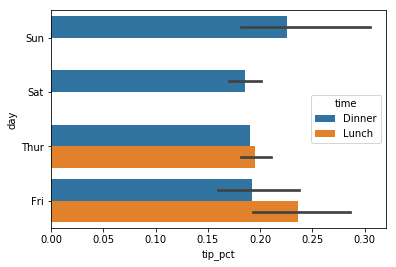

In [96]:
sns.barplot(x='tip_pct',y='day',data=tips,orient='h',hue='time')

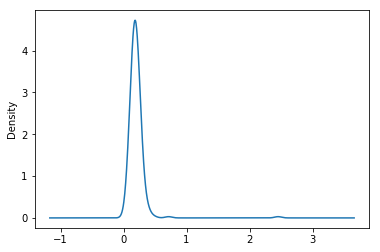

In [97]:
tips['tip_pct'].plot.density()

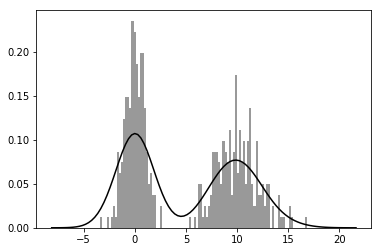

In [99]:
comp1 = np.random.normal(0,1,size=200)
comp2 = np.random.normal(10,2,size=200)
values = pd.Series(np.concatenate([comp1,comp2]))
sns.distplot(values,bins=100,color='k')

In [100]:
macro = pd.read_csv('examples/macrodata.csv')
macro.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [109]:
data = macro[['cpi','m1','tbilrate','unemp']]
data.head()

,cpi,m1,tbilrate,unemp
0,28.98,139.7,2.82,5.8
1,29.15,141.7,3.08,5.1
2,29.35,140.5,3.82,5.3
3,29.37,140.0,4.33,5.6
4,29.54,139.6,3.50,5.2


In [112]:
trans_data = np.log(data).diff().dropna()

In [113]:
trans_data.tail()

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5,1,'this is a title')

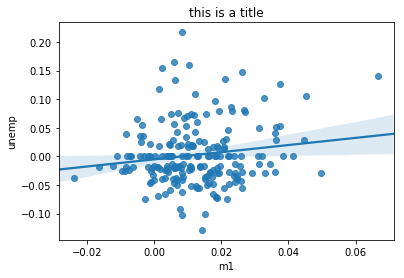

In [115]:
sns.regplot('m1','unemp',data=trans_data)
plt.title('this is a title')